## Observations and Insights 

### Import Dependencies & Data Sources

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import statsmodels.api as sm


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_data = pd.read_csv(mouse_metadata_path)
study_result = pd.read_csv(study_results_path)

### Merge DataFrames

In [2]:
merge_df = pd.merge(study_result, mouse_data, how="left", on="Mouse ID")

### Verify No. of Mice in Merged DataFrame

In [3]:
merge_df["Mouse ID"].nunique()

249

### Drop Duplicate Rows for Mouse ID & Timepoint

In [4]:
clean_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Timepoint           1888 non-null   int64  
 2   Tumor Volume (mm3)  1888 non-null   float64
 3   Metastatic Sites    1888 non-null   int64  
 4   Drug Regimen        1888 non-null   object 
 5   Sex                 1888 non-null   object 
 6   Age_months          1888 non-null   int64  
 7   Weight (g)          1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


### Verify No. of in Clean DataFrame

In [5]:
clean_df["Mouse ID"].nunique()

249

In [6]:
clean_2_df = clean_df.drop_duplicates(["Mouse ID"])
clean_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 249
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Timepoint           249 non-null    int64  
 2   Tumor Volume (mm3)  249 non-null    float64
 3   Metastatic Sites    249 non-null    int64  
 4   Drug Regimen        249 non-null    object 
 5   Sex                 249 non-null    object 
 6   Age_months          249 non-null    int64  
 7   Weight (g)          249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.5+ KB


In [7]:
clean_2_df["Mouse ID"].nunique()

249

### Optional: Get all the data for the duplicate mouse ID.

- found a function to do the obtain the difference
https://hackersandslackers.com/compare-rows-pandas-dataframes/

In [8]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    diff_df.to_csv('data/diff.csv')
    return diff_df

In [9]:
difference = dataframe_difference(merge_df, clean_df)
difference

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),_merge
360,g989,5,47.570392,0,Propriva,Female,21,26,left_only
681,g989,10,49.880528,0,Propriva,Female,21,26,left_only
869,g989,15,53.442020,0,Propriva,Female,21,26,left_only
1111,g989,20,54.657650,1,Propriva,Female,21,26,left_only


In [10]:
difference.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 360 to 1111
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Mouse ID            4 non-null      object  
 1   Timepoint           4 non-null      int64   
 2   Tumor Volume (mm3)  4 non-null      float64 
 3   Metastatic Sites    4 non-null      int64   
 4   Drug Regimen        4 non-null      object  
 5   Sex                 4 non-null      object  
 6   Age_months          4 non-null      int64   
 7   Weight (g)          4 non-null      int64   
 8   _merge              4 non-null      category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 396.0+ bytes


# Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

### Method 1:

In [11]:
summ_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summ_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summ_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summ_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summ_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": summ_mean, "Median": summ_median, "Standard Deviation": summ_std,
                         "Variance": summ_var, "SEM": summ_sem})
summary_df

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


### Method 2:

- This method produces everything in a single groupby function.

In [12]:
grouped = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
grouped.agg({np.mean, np.median, np.var, np.std, sem})

/home/bdr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/bdr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/bdr/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,std,var,median,sem
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.393463,6.568014,43.138803,50.909965,0.525862
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


## Bar Plots

- Generate a bar plot showing the number of mice per time point for __each__ treatment throughout the course of the study using pandas.

### Method 1:

In [13]:
#Create a list of all Drugs
drugs = clean_df["Drug Regimen"].unique()

#Create a Function to Graph No. of Mice for a Specific Drug
def createBarChart(drug, dframe):
    filter_drugx = clean_df.loc[dframe["Drug Regimen"] == drug]
    agg_by_timepoint = filter_drugx.groupby(["Timepoint"])["Mouse ID"].nunique()
    time_chart = agg_by_timepoint.plot(kind="bar", title=f"Number of Mice over {drug} Trial", color="yellowgreen")
    time_chart.set_xlabel("Days into the Drug Trial")
    time_chart.set_ylabel("Number of Trips Taken")
    plt.show()

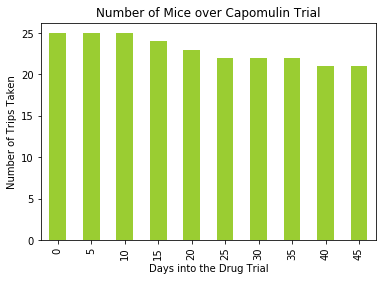

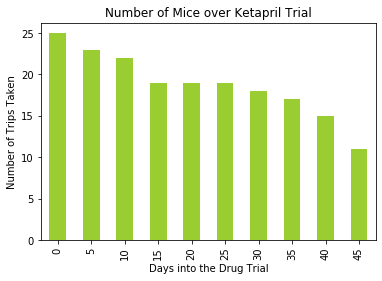

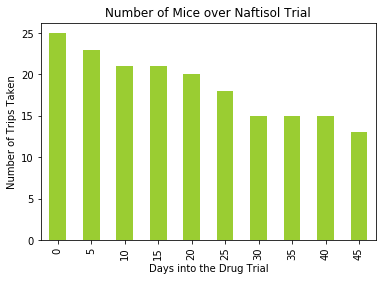

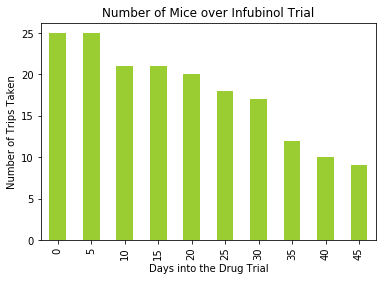

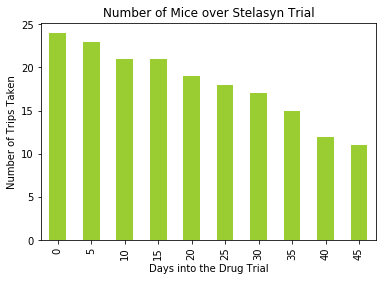

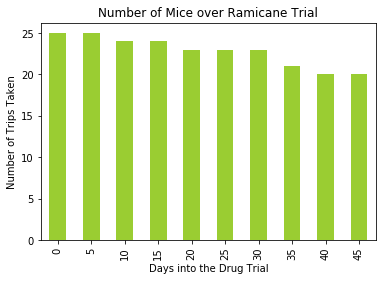

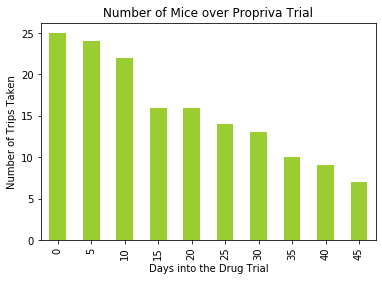

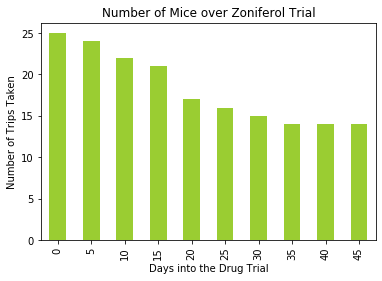

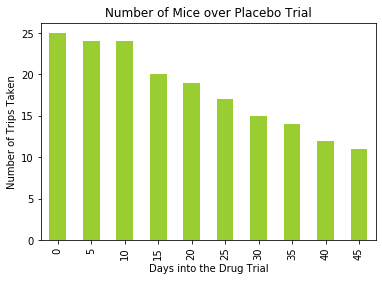

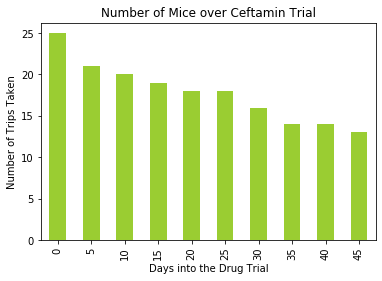

In [14]:
for drug in drugs:
    createBarChart(drug, clean_df)

### Method 2:

- Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


In [15]:
#Create a list of all Drugs
drugs_2 = clean_df["Drug Regimen"].unique()
drugs_2

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [16]:
#Create a Function to Graph No. of Mice for a Specific Drug
def createBarChartMat(drug, dframe):
    filter_drugx_2 = clean_df.loc[dframe["Drug Regimen"] == drug]
    agg_by_timepoint_2 = filter_drugx_2.groupby(["Timepoint"])["Mouse ID"].nunique()

    plt.bar(agg_by_timepoint_2.index, agg_by_timepoint_2.tolist(), color='indigo', alpha=0.5, align="center")
    plt.xlabel("Days into Drug Trial")
    plt.ylabel("Number of Mice")
    plt.title(f"Number of Mice over {drug} Trial")
    plt.tight_layout()
    plt.show()

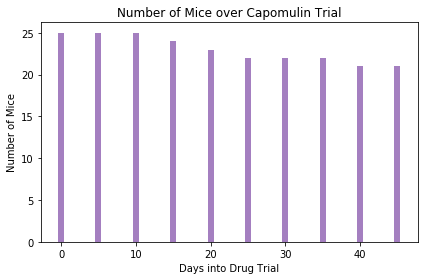

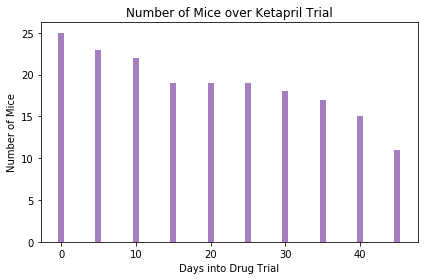

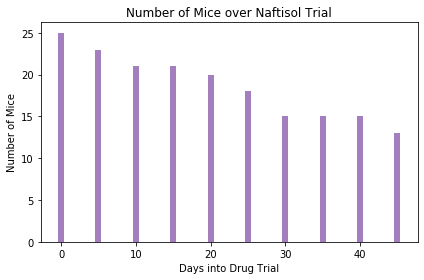

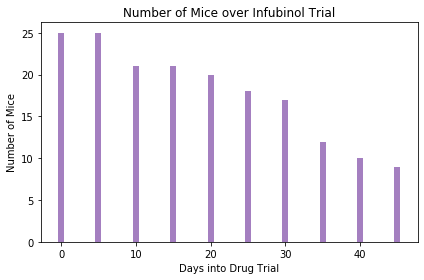

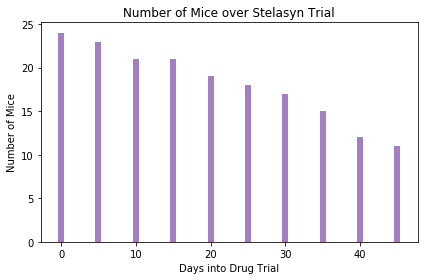

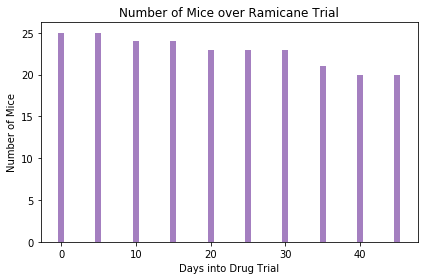

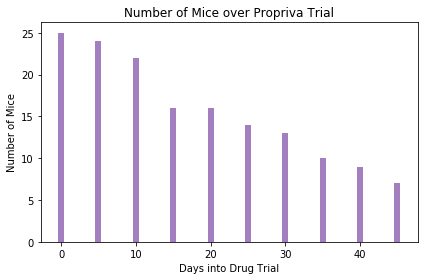

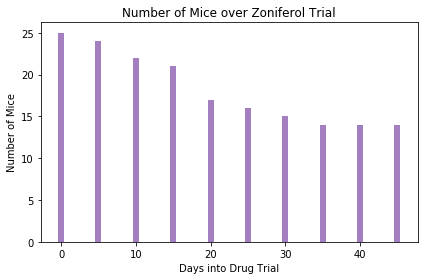

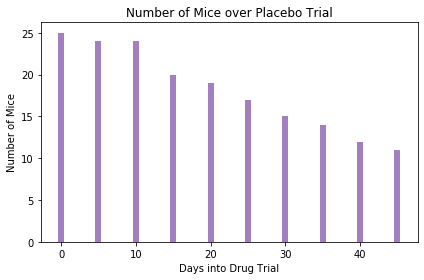

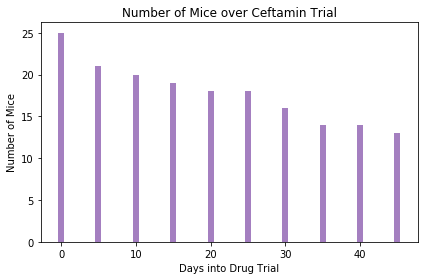

In [17]:
for drug in drugs_2:
    createBarChartMat(drug, clean_df)

## Pie Plots

- Generate a pie plot showing the distribution of female versus male mice

### Method 1:

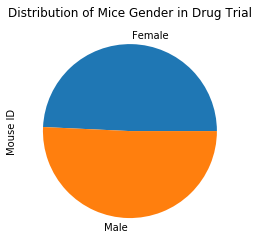

In [18]:
gender = clean_df.groupby("Sex")["Mouse ID"].count()
gender.plot(kind="pie", title="Distribution of Mice Gender in Drug Trial")
plt.show()

### Method 2:

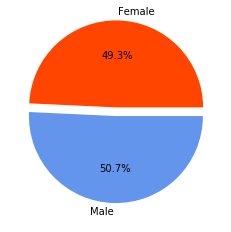

In [19]:
gender_list = gender.tolist()
sex = ["Female", "Male"]
colors = ["orangered", "cornflowerblue"]
explode = (0.1, 0)
plt.pie(gender_list, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#### Determine the Top Most Promising Treatment Regimens

In [20]:
top_4 = clean_df.loc[clean_df["Timepoint"] == 45]
top_4 = top_4.groupby("Drug Regimen").nunique()
top_4.sort_values(by=['Mouse ID'], inplace=True, ascending=False)
top_4.drop(['Timepoint', 'Tumor Volume (mm3)','Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Drug Regimen'], axis=1, inplace=True)
top_4.head(4)

,Mouse ID
Drug Regimen,
Capomulin,21
Ramicane,20
Zoniferol,14
Ceftamin,13


#### Create Function to Output Tumor Volume for each mouse

In [21]:
def outputTumorVolume(drug, dframe):
    test_df = dframe.loc[dframe["Timepoint"] == 45]
    test_df = test_df.loc[test_df["Drug Regimen"] == drug]
    test_df.drop(['Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis=1, inplace=True)
    test_df.reset_index(drop=True, inplace=True)
    return test_df

#### Create List of Top 4 Promising Treatments

In [22]:
treatments = ["Capomulin", "Ramicane", "Zoniferol", "Ceftamin"]

#### Output Tumore Volumes Per Mouse ID for Top Performing Treatments

In [23]:
for treatment in treatments:
    temp_df = outputTumorVolume(treatment, clean_df)
    print(temp_df)

   Mouse ID  Tumor Volume (mm3) Drug Regimen
0      b128           38.982878    Capomulin
1      t565           34.455298    Capomulin
2      l509           41.483008    Capomulin
3      g288           37.074024    Capomulin
4      r554           32.377357    Capomulin
5      g316           40.159220    Capomulin
6      y793           31.896238    Capomulin
7      m957           33.329098    Capomulin
8      l897           38.846876    Capomulin
9      v923           40.658124    Capomulin
10     b742           38.939633    Capomulin
11     w914           36.041047    Capomulin
12     m601           28.430964    Capomulin
13     x401           28.484033    Capomulin
14     s185           23.343598    Capomulin
15     i738           37.311846    Capomulin
16     s710           40.728578    Capomulin
17     j119           38.125164    Capomulin
18     i557           47.685963    Capomulin
19     r944           41.581521    Capomulin
20     u364           31.023923    Capomulin
   Mouse I

### Calculate the IQR and quantitatively determine if there are any potential outliers. 

- no outliers observed

In [24]:
#Create DataFrames containing Tumor Volumes details for the top performing treatments
Capomulin_tv = outputTumorVolume(treatments[0], clean_df)
Ramicane_tv = outputTumorVolume(treatments[1], clean_df)
Zoniferol_tv = outputTumorVolume(treatments[2], clean_df)
Ceftamin_tv = outputTumorVolume(treatments[3], clean_df)

#Consolidate the DataFrames
merge_df_1 = pd.merge(Capomulin_tv, Ramicane_tv, how="outer")
merge_df_2 = pd.merge(Zoniferol_tv, Ceftamin_tv, how="outer")
merge_df_3 = pd.merge(merge_df_1, merge_df_2, how="outer")
merge_df_3.drop(['Mouse ID', 'Drug Regimen'], axis=1, inplace=True)

In [25]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = merge_df_3["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 34.232074035
The upper quartile of temperatures is: 63.121691337499996
The interquartile range of temperatures is: 28.8896173025
The the median of temperatures is: 40.663359595 
Values below -9.102351918750003 could be outliers.
Values above 106.45611729125 could be outliers.


### Create Box Plot of Tumor Volumes

- Box plot does not indicate any outliers

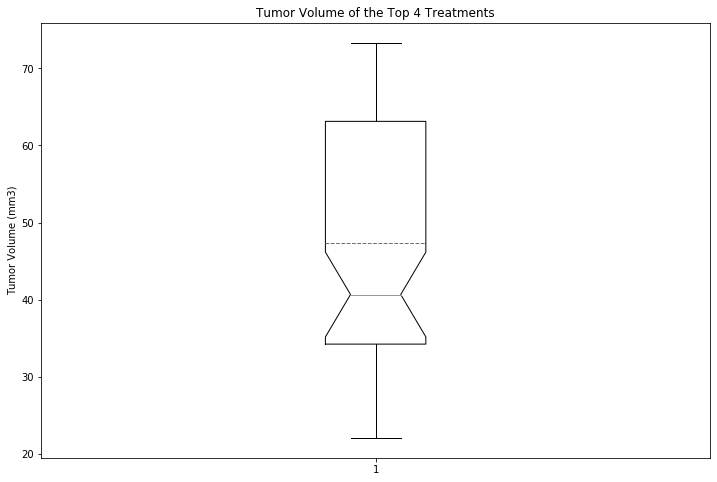

In [26]:
plt.figure(figsize=(12, 8))
plt.boxplot(merge_df_3["Tumor Volume (mm3)"], showmeans=True, meanline=True, notch=True)
plt.title('Tumor Volume of the Top 4 Treatments')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

#### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

- Filter results for Capomulin Drug Trial
- Create new dataframe (temp) with columns "Mouse ID", "Tumor Volume (mm3)", "Timepoint"
- Filter for specific mouse (Mouse ID b128)

In [27]:

only_Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
temp = only_Capomulin[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]].reset_index(drop=True)
temp = temp.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume"})


specific_mouse =  temp.loc[temp["Mouse ID"] == "b128"]
specific_mouse.drop(['Mouse ID'], axis=1, inplace=True)
#specific_mouse = specific_mouse.set_index('Timepoint')
specific_mouse

/home/bdr/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Tumor_Volume,Timepoint
0,45.000000,0
47,45.651331,5
70,43.270852,10
76,43.784893,15
101,42.731552,20
139,43.262145,25
157,40.605335,30
177,37.967644,35
188,38.379726,40
209,38.982878,45


In [28]:
specific_mouse["Tumor_Volume"]

0      45.000000
47     45.651331
70     43.270852
76     43.784893
101    42.731552
139    43.262145
157    40.605335
177    37.967644
188    38.379726
209    38.982878
Name: Tumor_Volume, dtype: float64

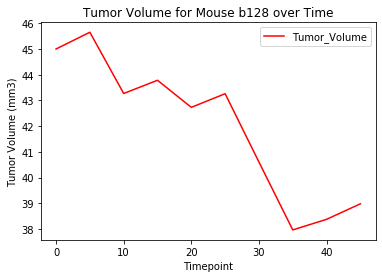

In [29]:
specific_mouse.plot(kind='line',x='Timepoint',y='Tumor_Volume', color='red')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume for Mouse b128 over Time")
plt.show()

### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

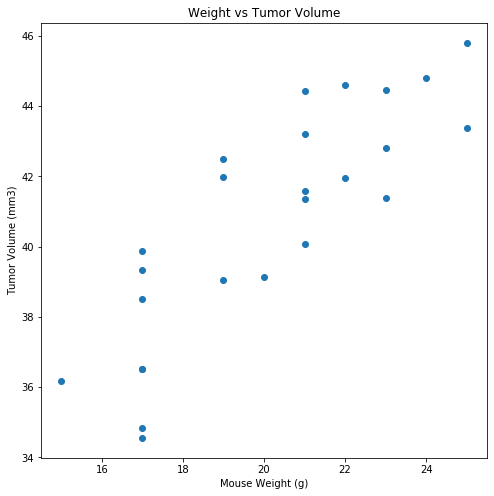

In [30]:
Capomulin_2 = only_Capomulin.groupby("Mouse ID").mean()
Capomulin_2 = Capomulin_2.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume", "Weight (g)": "Weight"})

plt.figure(figsize=(8, 8))
plt.scatter(Capomulin_2.Weight, Capomulin_2.Tumor_Volume)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume")
plt.show()

## Correlation and Regression

- High correlation between __Weight__ and __Tumor Volume__

In [31]:
Capomulin_2.corr()

,Timepoint,Tumor_Volume,Metastatic Sites,Age_months,Weight
Timepoint,1.000000,-0.116552,0.443939,-0.352502,-0.256449
Tumor_Volume,-0.116552,1.000000,-0.099062,0.015190,0.841936
Metastatic Sites,0.443939,-0.099062,1.000000,-0.074090,-0.218440
Age_months,-0.352502,0.015190,-0.074090,1.000000,-0.074396
Weight,-0.256449,0.841936,-0.218440,-0.074396,1.000000


In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


X = Capomulin_2.Weight ## X usually means our input variables (or independent variables)
y = Capomulin_2.Tumor_Volume ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Tumor_Volume   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.32e-07
Time:                        23:33:32   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.000      16.192      26.912
Weight         0.9544      0.128      7.483      0.000       0.691       1.218
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.951
Skew:                          -0.025   Prob(JB):                        0.622
Kurtosis:                       2.046   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Checking for correlation between __predicted__ and __actual__ values
- Ideally, there should no correlation between these two values
- Scatter plot indicates that some correlation does exist

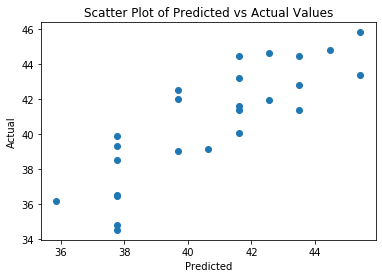

In [33]:
plt.scatter(predictions, Capomulin_2.Tumor_Volume)
plt.title("Scatter Plot of Predicted vs Actual Values")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
x_values = Capomulin_2.Weight
y_values = Capomulin_2.Tumor_Volume

#Run Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values + str(round(slope,2)) + "x + " + str(round(intercept, 2))

#Plot Scatter Plot
plt.scatter(x_values, y_values)

#Plot Regression Lines
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15, color="red")

#Label Plot
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')

#Print r squared value
print(f"R squared: {rvalue**2}")

#Show Plot
plt.show

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')